# Chicago Crime Analysis and Classification

Historically, Chicago saw a major rise in violent crime starting in the later 1960s [1]. More recently, the crime situation in Chicago is getting even worse. Last year, Chicago has experienced a recent spike in homicides of 762 people, an increase of 58 percent over 2015 [2]. Compared with other largest cities in United States, Chicago has a significantly higher murder rate than New York or Los Angeles [3]. There is no denying the fact that crimes have become a severe social concern for Chicago as prosperous communities in the long term. 
Here, we are interested to analyze the Chicago crime data through visualization tools in python, and make predictions for the category of crimes given time and location, using machine learning algorithms.


In [2]:
import warnings
from data import Data
from model import Model
import vis
warnings.filterwarnings('ignore')

In [3]:
# Data is a class defined in data.py, which imports and cleans data
crimes = Data()

Read in data...
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 510070 entries, 2015-09-16 03:51:00 to 2016-05-03 20:55:00
Data columns (total 21 columns):
ID                      510070 non-null int64
Case Number             510070 non-null object
Block                   510070 non-null object
IUCR                    510070 non-null object
Primary Type            510070 non-null object
Description             510070 non-null object
Location Description    510070 non-null object
Arrest                  510070 non-null bool
Domestic                510070 non-null bool
Beat                    510070 non-null int64
District                510070 non-null int64
Ward                    510070 non-null float64
Community Area          510070 non-null int64
FBI Code                510070 non-null object
X Coordinate            510070 non-null float64
Y Coordinate            510070 non-null float64
Year                    510070 non-null int64
Updated On              510070 non-null object

## Data description
The data is imported from the Chicago Data Portal website (https://data.cityofchicago.org/), which is a collection of city data related not only to crimes, but also to education, transportation, health, and so on.
I keep 10 columns for the model development:
- Primary Type - The primary type of crimes. For the purpose of convenience, I kept only those with high frequency and HOMICIDE.
- Location Description - Description of the location where the incident occurred. I kept only those with highest frequency.
- Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
- Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.
- District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.
- Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.
- Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.
- Year - Year the incident occurred.
- Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
- Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
- Month - Month the incident occured.
- Weekday - [0 to 6] correspond to [Monday to Sunday].
- Hour - Hour the incident occured.

## Explanatory Visualization

To make the model more robust and efficient, here, we transform the ‘Primary Type’ to major crime types (THEFT, BATTERY, CRIMINAL DAMAGE, ASSAULT, NARCOTICS, DECEPTIVE PRACTICE, BURGLARY), severe crime type (HOMICIDE) and group all other type of crimes to OTHER OFFENSE.


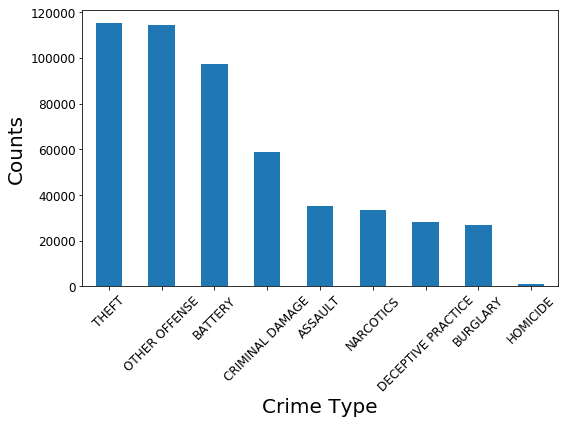

In [4]:
vis.plot_bar(crimes.data, 'Total')

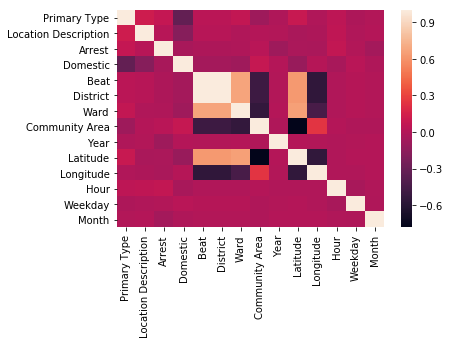

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df = crimes.data.copy()
for col in ['Location Description', 'Primary Type']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
corr = df.corr()
sns.heatmap(corr)
plt.show()

In [8]:
print corr['Primary Type']

Primary Type            1.000000
Location Description    0.122945
Arrest                  0.075907
Domestic               -0.323254
Beat                    0.036619
District                0.036563
Ward                    0.069778
Community Area         -0.082839
Year                   -0.015286
Latitude                0.092038
Longitude              -0.006738
Hour                    0.047289
Weekday                -0.018511
Month                   0.003654
Name: Primary Type, dtype: float64


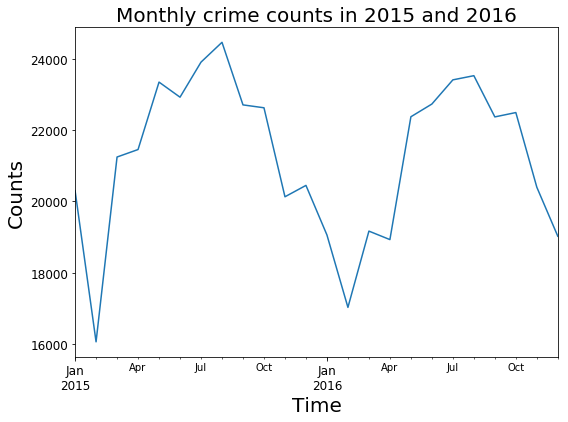

In [5]:
vis.plot_time(crimes.data)

This plot shows the crime numbers for all types for the past two years. Apparently, summer has more crime than other seasons. February has seen the least of crimes, probably due to the cold weather at that time in Chicago.

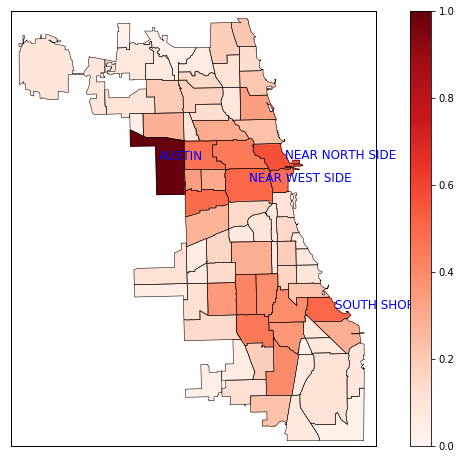

In [6]:
vis.plot_map_community(crimes.data, 'Total')

The graph above shows the standardized total crime counts ((#current - #min)/(#max - #min)) in different communities. Those communities with servere crime problems (> 0.5) are Austin, Near North Side, Near West Side, South Shore. 

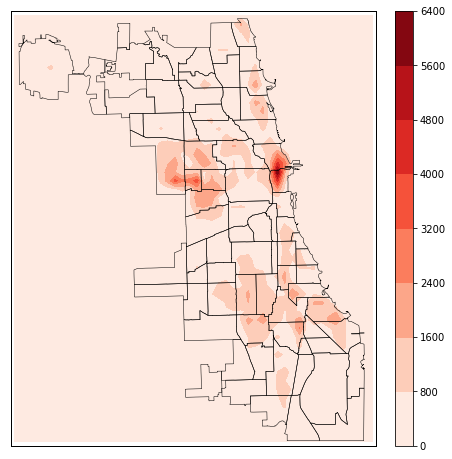

In [7]:
vis.plot_map_contour(crimes.data, 'Total')

The graph above shows the contour plot of crime counts on the Chicago city map. 

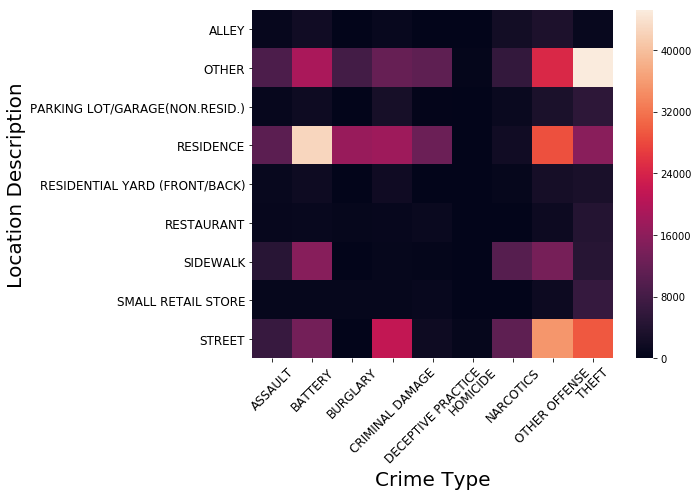

In [5]:
vis.plot_heatmap(crimes.data, 'Location Description')

From the heatmap above, there is a correlation between the crime type and locations. For instance, for a crime occur in residence, it is probably a battery.

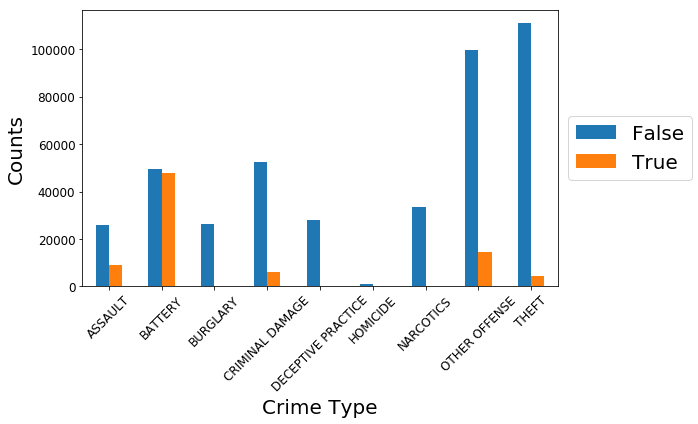

In [9]:
vis.plot_bar(crimes.data, 'Domestic')

For a domoestic crime, it is unlikely to be a burglary, deceptive practice, homicide, narcotics.

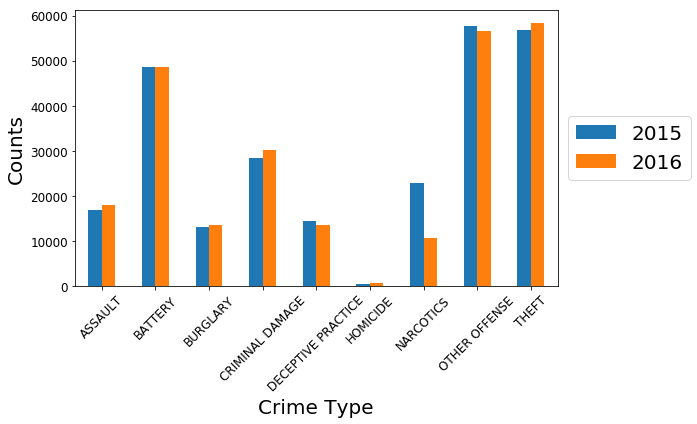

In [12]:
vis.plot_bar(crimes.data, 'Year')

In [7]:
import pandas as pd
import numpy as np
crime_year = pd.crosstab(crimes.data['Primary Type'], crimes.data['Year'])
crime_year['increase rate'] = np.round((crime_year[2016]-crime_year[2015])/crime_year[2015]*100,
                                       2)
crime_year

Year,2015,2016,increase rate
Primary Type,,,
ASSAULT,16945,18076,6.67
BATTERY,48578,48666,0.18
BURGLARY,13084,13619,4.09
CRIMINAL DAMAGE,28527,30185,5.81
DECEPTIVE PRACTICE,14577,13507,-7.34
HOMICIDE,467,750,60.60
NARCOTICS,22839,10662,-53.32
OTHER OFFENSE,57744,56690,-1.83
THEFT,56827,58327,2.64


For most types of crimes, the relative change is small, except that HOMICIDE increased by 60.6% and NARCOTICS decreased by 53.32%.

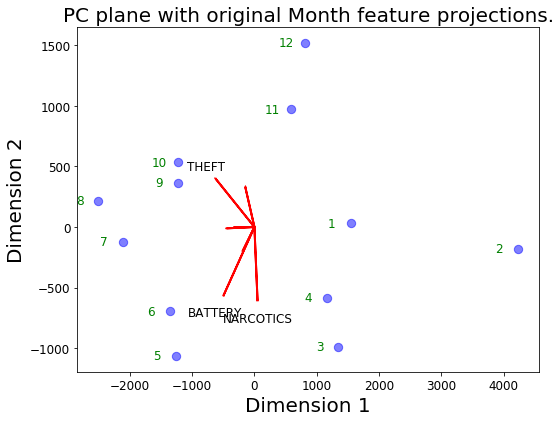

In [5]:
vis.biplot(crimes.data, 'Month')

PCA decomposition is performed on the crime counts by month and crime type. The biplot shows the data point along the principal components. From the first principal component, we consistently observed that there are generally more crimes from May to October. The second principal component shows that BATTERY and NARCOTICS have a higher frequency in May and June, while THEFT occurs more from September to October.

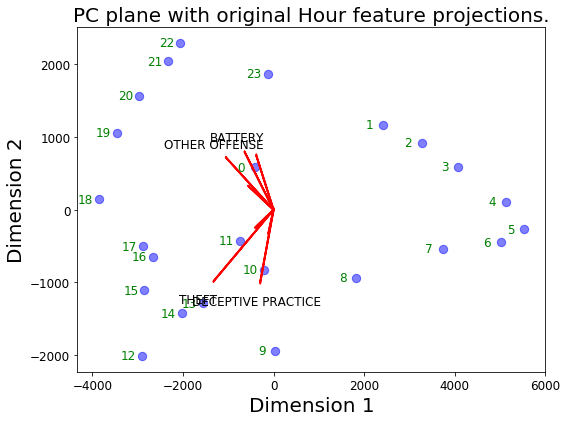

In [6]:
vis.biplot(crimes.data, 'Hour')

Similar biplot shows the crime counts by hour and crime types. From the first principal component, we observed that there are generally more crimes from noon to midnight. The second principal component shows that BATTERY and OTHER OFFENSE have a higher frequency at night (from 19 to 23), while THEFT and DECEPTIVE PRACTICE occurs more in the afternoon (from 12 to 15).

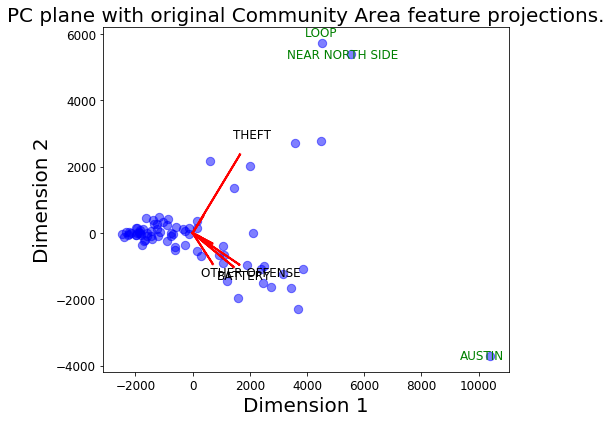

In [4]:
vis.biplot(crimes.data, 'Community Area', crimes.community_name)

PCA decomposition is performed on the crime counts by community area and crime type. The biplot shows the data point along the principal components. From the second principal component shows that BATTERY and NARCOTICS have a higher frequency in AUSTIN, while THEFT occurs more near downtown (LOOP and NEAR NORTH SIDE).

THEFT


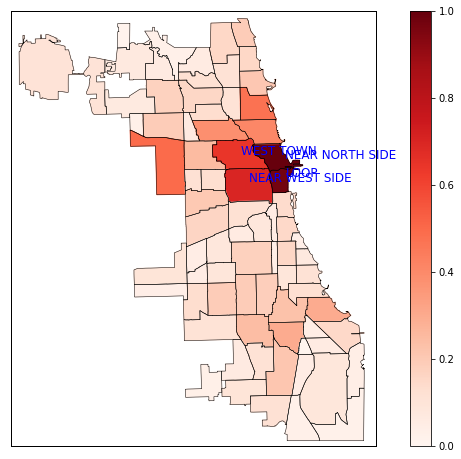

BATTERY


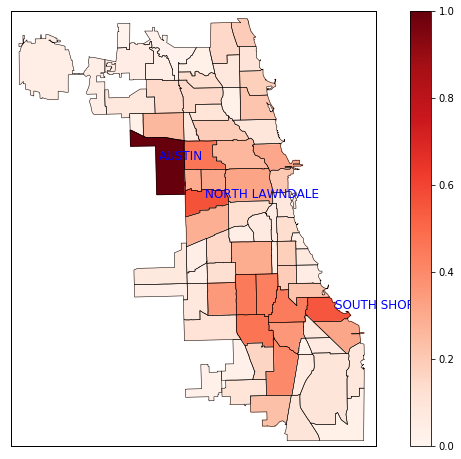

CRIMINAL DAMAGE


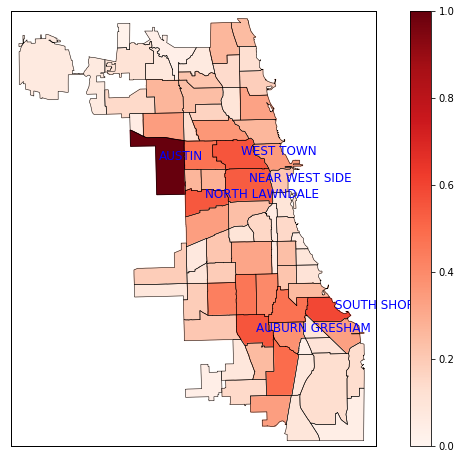

ASSAULT


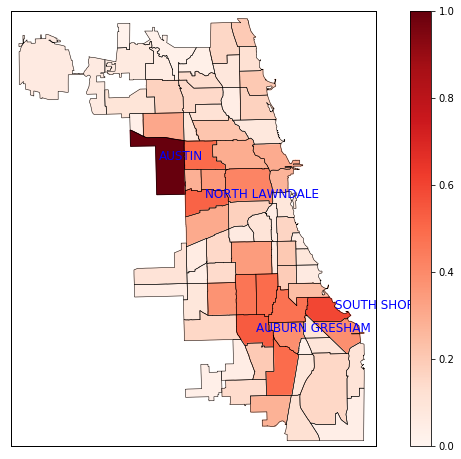

NARCOTICS


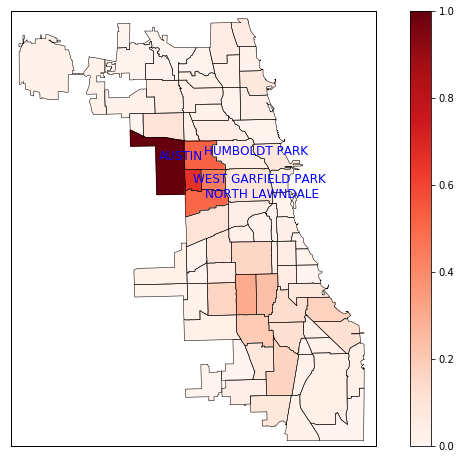

OTHER OFFENSE


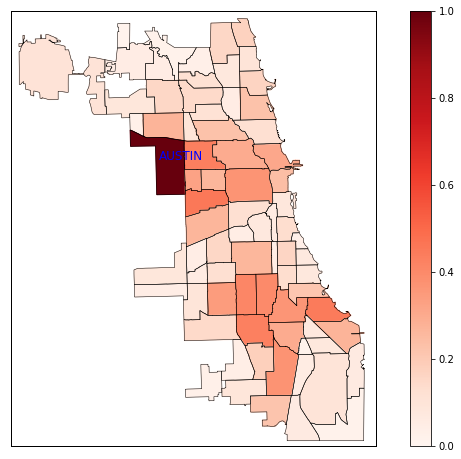

DECEPTIVE PRACTICE


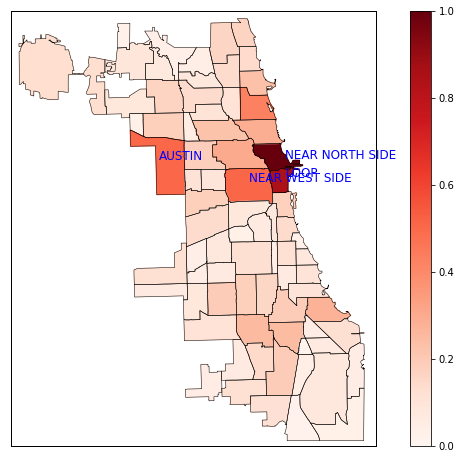

BURGLARY


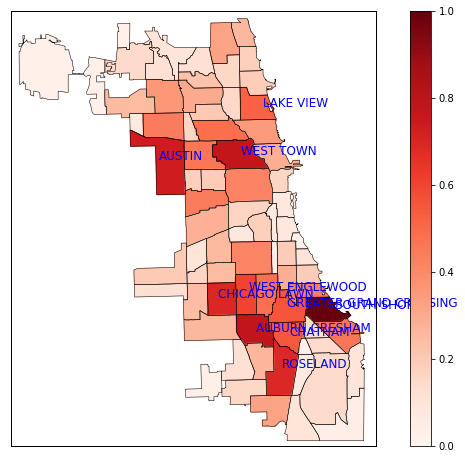

HOMICIDE


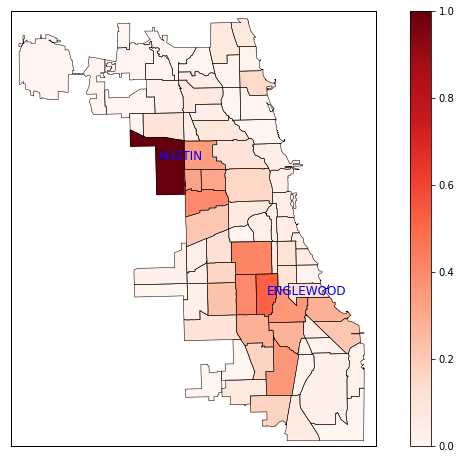

In [4]:
for name in crimes.target_name:
    print name
    vis.plot_map_community(crimes.data, name)

The maps above provide more detailed information:
- Austin is the community with high crime rate of BATTERY, CRIMINAL DAMAGE, ASSAULT, NARCOTICS and OTHER OFFENSE.  
- THEFT and DECEPTIVE PRACTICE occurred more near downtown.
- BURGLARY has high outbreak in southen communities.

## Data Preparation

In [4]:
crimes.random_sample(0.2)

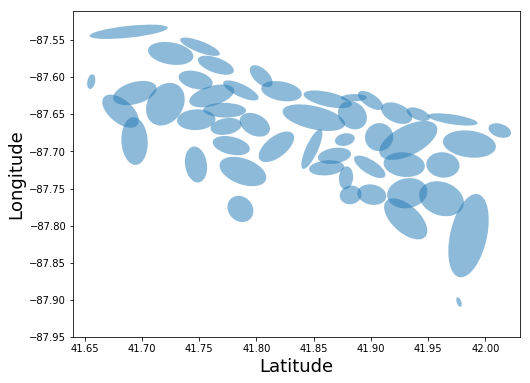

Splitting data...
x_Training set has 61208 rows, 14 columns.
x_Test set has 40806 rows, 14 columns.


In [5]:
crimes.preprocessing()

I randomly sampled 20% of the data in order to same computational time. A new feature is created by clustering the crime position (latitude and longitude), using Gaussian Mixture Model. The dataset is then split into the training set and testing set (6:4).

## Benchmark Model
As a classification problem, the logistic regression model is used as a benchmark model. Logistic regression is a linear model, which could be used for the multi-class categorization. Two different regularization method, Ridge and Lasso will be tested with a range of regularization parameter values.

Start grid search for logit...
{'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']}


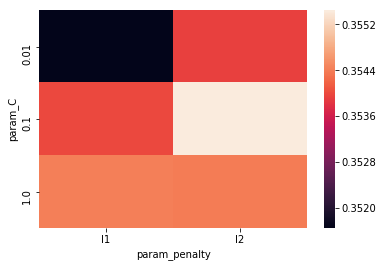

Best parameters chosen is: {'penalty': 'l2', 'C': 0.1}
Best score is: 0.355443732845
Time used for searching is 2.64989601771.


In [5]:
param_logit_grid = {'logit_grid':
                            {'penalty': ['l1', 'l2'],
                             'C': [10 ** i for i in range(-2, 1, 1)]}}
logit = Model(crimes, 'logit', param_logit_grid)
res = logit.grid_search_all('accuracy', 3)

In [11]:
param_logit = {'logit': {'penalty': 'l2', 'C': 0.1}}
logit = Model(crimes, 'logit', param_logit)
res = logit.run_all()

logloss: 1.667459
accuracy: 0.358134


After a parameter search for logistic regression, the best hyper-parameters are chosen as ridge regression with C = 0.1. The log-loss function and accuracy on the test data-set are 1.667 and 35.8%.

## XGBOOST

To go beyond linearity, the tree-based Gradient Boosting will be used with the package ‘xgboost’. This algorithm combines weak learners into one strong powerful learner. The parameters wait to be tuned are:
- The learning rate (eta)
- Min_child_weight, which defines the minimum sum of weights of all observations required in a chiral.
- Max_depth, which is the maximum depth of each weaker learner. Deep trees lead to over-fitting more easily.
- Gamma, which is defined as the minimum loss reduction required to make a split. Higher value prevents the model from over-fitting.
- Subsample, which is the fraction of observations to be randomly samples for each tree. Lower value prevents the algorithm from over-fitting.


logloss: 1.430701


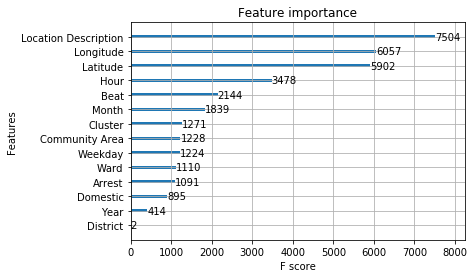

accuracy: 0.444714


In [12]:
param_xgb = {'xgb': {'learning_rate': 0.1,
             'max_depth': 4,
             'gamma': 1,
             'n_estimators': 650,
             'subsample': 1}}
xgb = Model(crimes, 'xgb', param_xgb)
res = xgb.run_all()

In [40]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_true = crimes.y_test
table = confusion_matrix(y_true, res, labels = crimes.target_name)
np.set_printoptions(precision=2)

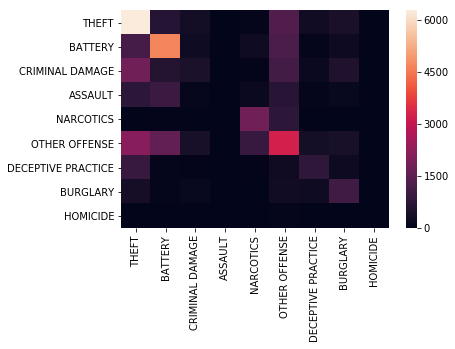

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
table = pd.DataFrame(table)
table.columns = crimes.target_name
table.index = crimes.target_name
sns.heatmap(table)
plt.show()

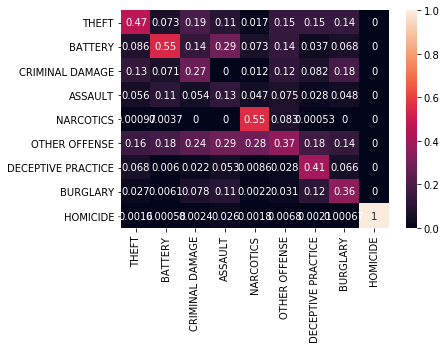

In [42]:
sns.heatmap(table / table.sum(axis=0), annot = True, vmin=0, vmax=1)
plt.show()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_true, res, target_names=['ASSAULT', 'BATTERY', 'BURGLARY', 'CRIMINAL DAMAGE',
                                                      'DECEPTIVE PRACTICE', 'HOMICIDE', 'NARCOTICS', 'OTHER OFFENSE',
                                                      'THEFT']))

                    precision    recall  f1-score   support

           ASSAULT       0.13      0.00      0.00      2834
           BATTERY       0.55      0.60      0.57      7838
          BURGLARY       0.36      0.50      0.42      2116
   CRIMINAL DAMAGE       0.27      0.10      0.14      4700
DECEPTIVE PRACTICE       0.41      0.34      0.37      2253
          HOMICIDE       1.00      0.11      0.20       117
         NARCOTICS       0.55      0.70      0.62      2587
     OTHER OFFENSE       0.37      0.36      0.36      9071
             THEFT       0.47      0.68      0.55      9290

       avg / total       0.41      0.45      0.42     40806



After a parameter search for xgboost regression, the log-loss function and accuracy on the test data-set are 1.43 and 44.5%, better than those of logistic regression.

# Conclusion
To sum up, this project is aimed to predict the Chicago crime type based on time and position information. The raw data from Chicago Data Portal is preprocessed to the features (year, month, weekday, hour, location description, community, latitude and longitude) and target variable (crime type), and then split into train, test dataset (6:4). After an exploration in the visualization of the crime data, we applied logistic regression (benchmark model) and xgboost algorithm with finely tuned parameters on the train and test dataset using k-fold cross-validation. The performance of two algorithms is evaluated with log loss function and accuracy and finally reported on the test dataset. Finally, with xgboost algorithm, we obtain an accuracy rate near 44.5%, much better than the accuracy of random guess with 9-category output (11.1%). 
